In [9]:
# Import packages

from mpl_toolkits.basemap import Basemap

import gdal

from matplotlib import cm
import numpy as np
from numpy import linspace
import matplotlib.pyplot as plt

% matplotlib inline
import os
os.chdir('/home/fvanden/Documents/EPFL/Python')
from ProfileLab.Auxiliary.spatialcalc import SpatialCalc

spat = SpatialCalc()

AttributeError: 'NoneType' object has no attribute 'ReadAsArray'

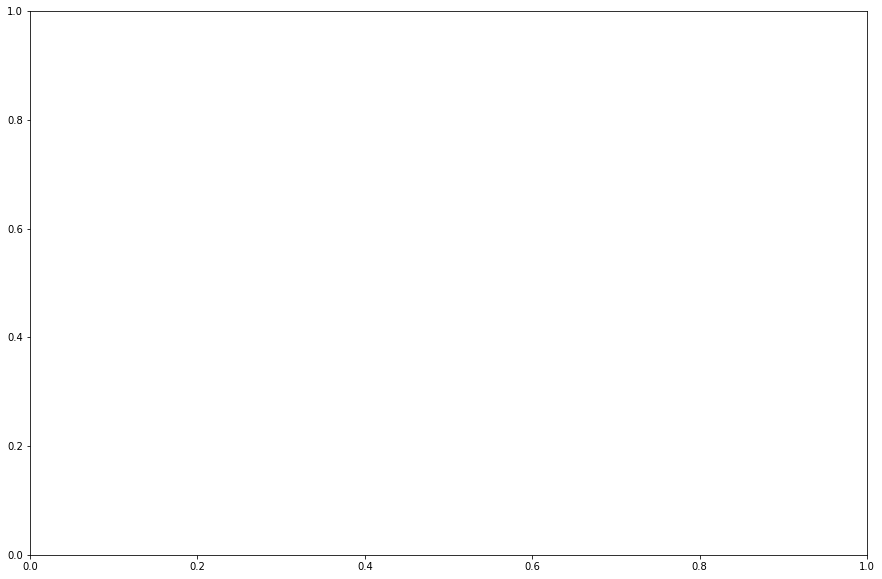

In [10]:
# create a figure and figure axes
fig, ax = plt.subplots(figsize = (15,10)) # <-- adapt the size here

# create a Basemap instance
# projection, string : possibilities include 'aeqd', 'laea' etc. For all possibilities and examples see: 
#    https://matplotlib.org/basemap/users/mapsetup.html
# lat_0, float : the latitude coordinate of the center of the map in WGS84
# lon_0, float : the longitude coordinate of the center of the map in WGS84
# resolution, string : the resolution of the map, either high (h) or low (l)
# llcrnrlon, float : the longitude coordinate of the lower left hand corner of the map
# llcrnrlat, float : the latitude coordinate of the lower left hand corner of the map
# urcrnrlon, float : the longitude coordinate of the upper right hand corner of the map
# urcrnrlat, float : the latitude coordinate of the upper right hand corner of the map

#ds = gdal.Open('/home/fvanden/Documents/MATLAB/Scripts_Peter/draw_switzerland_code/topography/srtm_39_03.tif')
ds = gdal.Open('/home/fvanden/Documents/MATLAB/Scripts_Peter/draw_switzerland_code/topography/srtm_38_03.tif')

data = ds.ReadAsArray()
geotransform = ds.GetGeoTransform()
topleft_x = geotransform[0]
we_pix_res = geotransform[1]
topleft_y = geotransform[3]
ns_pix_res = geotransform[5]

size_x = ds.RasterXSize
size_y = ds.RasterYSize


###

RasterSize = [size_x, size_y]


bottomleft_x = topleft_x + (we_pix_res * size_x)
bottomleft_y = topleft_y + (ns_pix_res * size_y)

LongitudeLimits = [topleft_x, bottomleft_x]
LatitudeLimits = [bottomleft_y,topleft_y]

lon = np.arange(topleft_x, bottomleft_x, we_pix_res)[:size_x]
lat = np.arange(bottomleft_y, topleft_y, we_pix_res)[:size_y]

###

start_lon_index = np.argmin(np.abs(lon - lon_lims[0]))
end_lon_index = np.argmin(np.abs(lon-lon_lims[1]))

start_lat_index = np.argmin(np.abs(lat[::-1]-lat_lims[1]))
end_lat_index = np.argmin(np.abs(lat[::-1]-lat_lims[0]))


###

data = data[start_lat_index:end_lat_index, start_lon_index:end_lon_index]
lat = lat[::-1][start_lat_index:end_lat_index]
lon = lon[start_lon_index:end_lon_index]

lon, lat = np.meshgrid(lon, lat)


map = Basemap(projection='merc', lat_0 = 46.92366, lon_0 = 8.22313, resolution = 'h', 
              llcrnrlon = 5.66546, llcrnrlat = 45.64841, urcrnrlon = 10.88976, urcrnrlat = 47.95012) 


# draw a line around the map region             
#map.drawmapboundary(fill_color='cadetblue') # <-- fill_color changes the color of the Sea. Names of colours
#map.drawmapboundary(fill_color='white')                                           # can be found here: 
#map.drawmapboundary()                                            # https://matplotlib.org/2.0.0/examples/color/named_colors.html

# draws the political boundaries
map.drawcountries(linewidth = 1.0, color = 'grey') # <-- the linewidth and the colour of the lines can be changed.
                                                # 'k' is black, 'r' is red, 'b' is blue etc

# draws the coastlines
map.drawcoastlines(linewidth = 1.0, color = 'grey')

# draw rivers
#map.drawrivers(linewidth = 1.0, color = 'aqua')

# colour the sea

# colour the land and the lakes
map.fillcontinents(color='white',lake_color='cadetblue') # <-- change the colours here

# draws a relief map, looks nice :-) , sometimes it's better to choose between fillcontinents and shadedrelief or 
# bluemarble

#map.shadedrelief() # <-- draws mountains etc
#map.bluemarble() # <-- looks like Google Earth, but very dark

# draw meridians and parallels

#map.drawparallels(np.arange(10,90,20)) # <-- locations where to draw them. This means from 10 to 90 in steps of 20
#map.drawmeridians(np.arange(-180,180,30))

# This is the important part: putting points on the map


lons = [8.512,6.099,8.833,7.487, 9.7945 ]
lats = [47.284,46.425,46.041,46.371, 46.8350]

labels = ['Albis','La Dôle','Mt Lema', 'Plaine Morte', 'Weissfluhgipfel']

x,y = map(lons, lats)

map.plot(x, y, 'ko', markerfacecolor = 'k', markersize=10)

for label, xpt, ypt in zip(labels, x, y):
    if label == 'Plaine Morte':
        plt.text(xpt+7000, ypt+10000, label, fontsize = 18, weight = 'bold', color = 'r')
    elif label == 'Weissfluhgipfel':
        plt.text(xpt-75000, ypt+10000, label, fontsize = 18, weight = 'bold', color = 'r')
    else:
        plt.text(xpt+7000, ypt+5000, label, fontsize = 18, weight = 'bold')
    
    
# square around research area

#lon_lims = [7.4,10.13]
#lat_lims = [46.0,48.3]

#46.8392
#47.9185

#7.71656
#9.32713


lat_r = [46.8392, 47.9185,47.9185, 46.8392,46.8392]
lon_r = [7.71656,7.71656,9.32713,9.32713,7.71656]

#lat_r = [46.0687,46.4265,46.4265,46.0687,46.0687]
#lon_r = [7.0459,7.0459,7.6308,7.6308,7.0459]

x,y = map(lon_r,lat_r)
map.plot(x,y,'k--', linewidth = 2.0, dashes = [6,2], alpha = ValaisAlpha)



plt.tight_layout()

# Save the figure

#fig.savefig('./mapEuropeSmall2.png', dpi=200)